# task 2

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers# type: ignore
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load and preprocess the CIFAR-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

 Define CNN model with regularization

In [4]:
def create_model(regularization=None):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularization))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularization))
    model.add(layers.Dense(10, activation='softmax'))
    return model

 Train and evaluate model with L1 regularization  (Lasso)

In [5]:
# (strength=0.001)
model_l1_001 = create_model(regularizers.l1(0.001))
model_l1_001.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1_001 = model_l1_001.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l1_001_accuracy = model_l1_001.evaluate(x_test, y_test)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2377 - loss: 2.9552 - val_accuracy: 0.3604 - val_loss: 1.9461
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3846 - loss: 1.8909 - val_accuracy: 0.4060 - val_loss: 1.8082
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4116 - loss: 1.7965 - val_accuracy: 0.4191 - val_loss: 1.7913
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4333 - loss: 1.7489 - val_accuracy: 0.4387 - val_loss: 1.7131
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4520 - loss: 1.6945 - val_accuracy: 0.4860 - val_loss: 1.6201
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4701 - loss: 1.6598 - val_accuracy: 0.4884 - val_loss: 1.6039
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4811 - loss: 1.6300 - val_accuracy: 0.4805 - val_loss: 1.6335
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4912 - loss: 1.6063 - val_acc

In [6]:
# (strength=0.01)
model_l1_01 = create_model(regularizers.l1(0.01))
model_l1_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1_01 = model_l1_01.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l1_01_accuracy = model_l1_01.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0995 - loss: 8.8773 - val_accuracy: 0.1000 - val_loss: 2.4522
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0994 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4519
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1022 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4531
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1011 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4514
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0970 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4531
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0998 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4523
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1002 - loss: 2.4524 - val_accuracy: 0.1000 - val_loss: 2.4519
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0980 - loss: 2.4524 - val_accu

In [7]:
# (strength=0.1)
model_l1_1 = create_model(regularizers.l1(0.1))
model_l1_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1_1 = model_l1_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l1_1_accuracy = model_l1_1.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.0987 - loss: 67.5141 - val_accuracy: 0.1000 - val_loss: 3.8128
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0976 - loss: 3.8151 - val_accuracy: 0.1000 - val_loss: 3.8094
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0965 - loss: 3.8148 - val_accuracy: 0.1000 - val_loss: 3.8274
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0999 - loss: 3.8151 - val_accuracy: 0.1000 - val_loss: 3.8059
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0983 - loss: 3.8146 - val_accuracy: 0.1000 - val_loss: 3.8257
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0977 - loss: 3.8149 - val_accuracy: 0.1000 - val_loss: 3.8117
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.1017 - loss: 3.8148 - val_accuracy: 0.1000 - val_loss: 3.8219
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0992 - loss: 3.8145 - val_accurac

Train and evaluate model with L2 regularization (Ridge)

In [8]:
# (strength=0.001)
model_l2_001 = create_model(regularizers.l2(0.001))
model_l2_001.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2_001 = model_l2_001.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l2_001_accuracy = model_l2_001.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3068 - loss: 1.9522 - val_accuracy: 0.4834 - val_loss: 1.4894
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5008 - loss: 1.4735 - val_accuracy: 0.5416 - val_loss: 1.3732
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5664 - loss: 1.3247 - val_accuracy: 0.5790 - val_loss: 1.3046
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6003 - loss: 1.2504 - val_accuracy: 0.6176 - val_loss: 1.2014
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6274 - loss: 1.1889 - val_accuracy: 0.6363 - val_loss: 1.1800
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6490 - loss: 1.1394 - val_accuracy: 0.6467 - val_loss: 1.1611
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6623 - loss: 1.1089 - val_accuracy: 0.6540 - val_loss: 1.1273
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6790 - loss: 1.0670 - val_accu

In [9]:
# (strength=0.01)
model_l2_01 = create_model(regularizers.l2(0.01))
model_l2_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2_01 = model_l2_01.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l2_01_accuracy = model_l2_01.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2769 - loss: 2.4332 - val_accuracy: 0.3609 - val_loss: 1.9264
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4137 - loss: 1.8004 - val_accuracy: 0.4596 - val_loss: 1.6946
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4580 - loss: 1.7096 - val_accuracy: 0.4836 - val_loss: 1.6418
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4865 - loss: 1.6499 - val_accuracy: 0.4517 - val_loss: 1.7552
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5031 - loss: 1.6165 - val_accuracy: 0.5310 - val_loss: 1.5565
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5187 - loss: 1.5929 - val_accuracy: 0.5321 - val_loss: 1.5458
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5345 - loss: 1.5627 - val_accuracy: 0.5387 - val_loss: 1.5326
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5502 - loss: 1.5379 - val_accu

In [10]:
# (strength=0.1)
model_l2_1 = create_model(regularizers.l2(0.1))
model_l2_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2_1 = model_l2_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l2_1_accuracy = model_l2_1.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0984 - loss: 5.0352 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1015 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0988 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accu

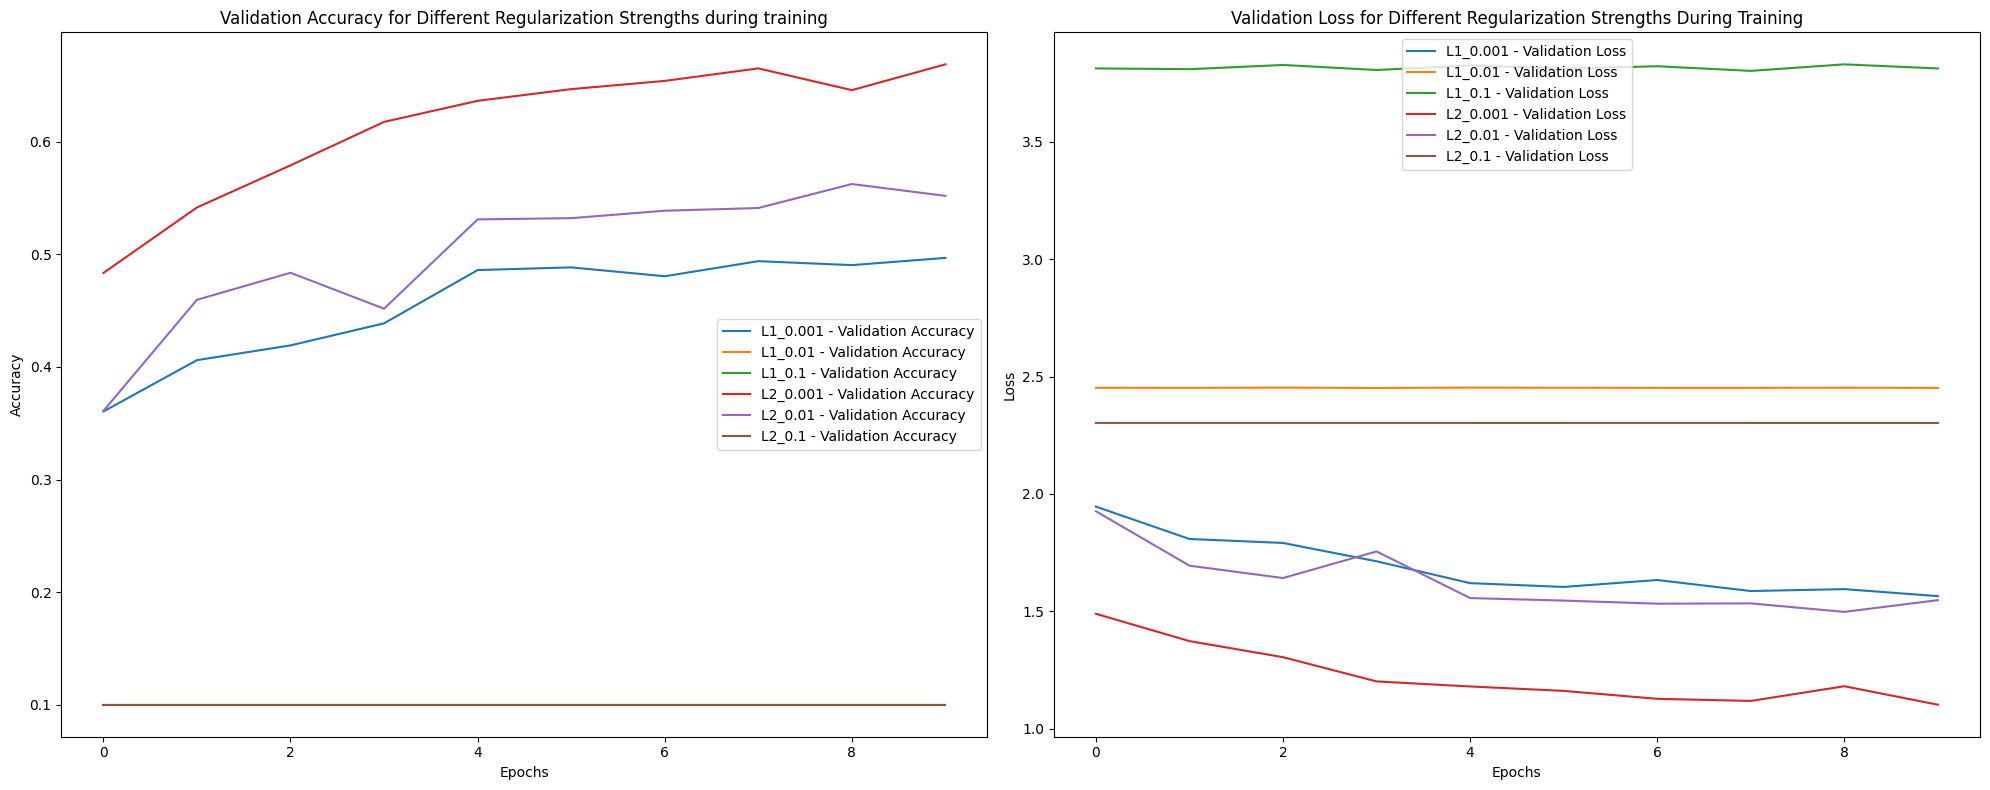

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First subplot - Validation Accuracy
sns.lineplot(ax=axes[0], data=history_l1_001.history['val_accuracy'], label='L1_0.001 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l1_01.history['val_accuracy'], label='L1_0.01 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l1_1.history['val_accuracy'], label='L1_0.1 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l2_001.history['val_accuracy'], label='L2_0.001 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l2_01.history['val_accuracy'], label='L2_0.01 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l2_1.history['val_accuracy'], label='L2_0.1 - Validation Accuracy')

# Set titles and labels for the first plot
axes[0].set_title('Validation Accuracy for Different Regularization Strengths during training')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Second subplot - Validation Loss
sns.lineplot(ax=axes[1], data=history_l1_001.history['val_loss'], label='L1_0.001 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l1_01.history['val_loss'], label='L1_0.01 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l1_1.history['val_loss'], label='L1_0.1 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l2_001.history['val_loss'], label='L2_0.001 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l2_01.history['val_loss'], label='L2_0.01 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l2_1.history['val_loss'], label='L2_0.1 - Validation Loss')

# Set titles and labels for the second plot
axes[1].set_title('Validation Loss for Different Regularization Strengths During Training')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
accuracies = [model_l1_001_accuracy[1], model_l1_01_accuracy [1], model_l2_1_accuracy[1], model_l2_001_accuracy[1], model_l2_01_accuracy[1], model_l2_1_accuracy[1]]
losses = [model_l1_001_accuracy[0], model_l1_01_accuracy [0], model_l2_1_accuracy[0], model_l2_001_accuracy[0], model_l2_01_accuracy[0], model_l2_1_accuracy[0]]
labels = ['L1_0.001', 'L1_0.01','L1_0.1', 'L2_0.001', 'L2_0.01', 'L2_0.1']
data = pd.DataFrame({
    'Regularization': labels,
    'Accuracy': accuracies,
    'Loss': losses
})
print(data)

  Regularization  Accuracy      Loss
0       L1_0.001    0.4968  1.565565
1        L1_0.01    0.1000  2.451752
2         L1_0.1    0.1000  2.302607
3       L2_0.001    0.6687  1.101754
4        L2_0.01    0.5519  1.547452
5         L2_0.1    0.1000  2.302607


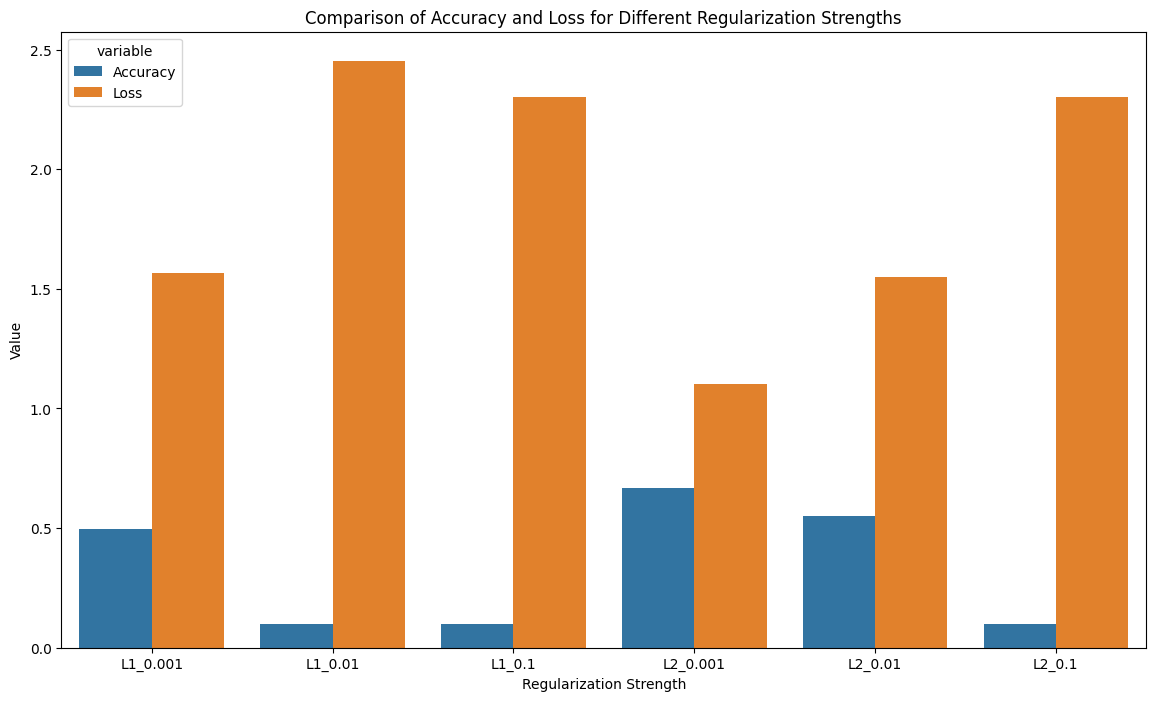

In [13]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Regularization', y='value', hue='variable', data=pd.melt(data, ['Regularization']))
plt.title('Comparison of Accuracy and Loss for Different Regularization Strengths')
plt.ylabel('Value')
plt.xlabel('Regularization Strength')
plt.show()

# Report on Overfitting and Underfitting with Regularization on CIFAR-10
## Introduction
This report explores the impact of regularization on the performance of a neural network trained on the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 colour images across 10 classes, making it a challenging task for image classification. In this study, we investigate the effects of L1 and L2 regularization with varying strengths on the model's accuracy and loss.
## Results Summary
The following table summarizes the accuracy and loss achieved by the neural network with different regularization techniques and strengths:
|Regularization	| Accuracy|	Loss|
|----------------|---------|------|
|L1 (0.001)| 0.4968|	1.565565|
|L1 (0.01)	|0.1000	| 2.451752|
|L1 (0.1)	|0.1000	| 2.302607|
|L2 (0.001)	| 0.6687 | 1.101754|
|L2 (0.01)	| 0.5519 | 1.547452|
|L2 (0.1)	|0.1000	| 2.302607|

Observations:
1.	L1 Regularization:
-	L1_0.001:
    + Accuracy: 49.68%
    + Loss: 1.5656
    + Interpretation: This configuration provides moderate performance, suggesting a balance between underfitting and overfitting, though the accuracy is relatively low.
-	L1_0.01 & L1_0.1:
    +	Accuracy: 10.00% (for both)
    +	Loss: 2.4518 (L1_0.01) & 2.3026 (L1_0.1)
    +	Interpretation: The significant drop in accuracy and the increase in loss indicate severe underfitting, likely due to overly strong regularization penalizing model complexity excessively.

2.	L2 Regularization:
-	L2_0.001:
    +	Accuracy: 66.87%
    +	Loss: 1.1018
    +	Interpretation: This configuration achieves the best accuracy, indicating effective regularization that mitigates overfitting while maintaining model complexity.
-	L2_0.01:
    +	Accuracy: 55.19%
    +	Loss: 1.5475
    +	Interpretation: Performance declines with stronger regularization, showing a shift towards underfitting.
-	L2_0.1:
    +	Accuracy: 10.00%
    +	Loss: 2.3026
    +	Interpretation: Like L1 at higher strengths, L2_0.1 causes severe underfitting, as indicated by minimal accuracy and high loss.

## Analysis:
-	L1 Regularization: The L1 regularization strength of 0.001 is the most effective within this set, though it still results in relatively low accuracy. Higher L1 strengths (0.01 and 0.1) lead to severe underfitting, as the model becomes too simplistic to capture the patterns in the data.
-	L2 Regularization: L2 regularization with a strength of 0.001 yields the best performance, balancing model complexity with the prevention of overfitting. Increasing the strength to 0.01 and 0.1 progressively harms model performance, suggesting underfitting.

## Justification for Chosen Regularization Strength
Based on the observations, the L2 regularization with a strength of 0.001 seems to be the most suitable choice for the CIFAR-10 dataset. This configuration achieves a reasonably high accuracy of 66.87% while maintaining a low loss of 1.1018. The model exhibits some signs of overfitting, but it is still performing well compared to the other configurations.L2 regularization is generally preferred over L1 regularization because it tends to produce more stable and generalizable models. L1 regularization can lead to sparse weight vectors, which may not always be desirable in complex tasks like image classification. It’s important to note that the optimal regularization strength can vary depending on the specific dataset, model architecture, and training hyperparameters. Further experimentation with different regularization strengths or techniques, such as dropout or batch normalization, may help improve the model's performance and generalization capabilities.

## Conclusion
In this study, we explored the impact of L1 and L2 regularization on the performance of a neural network trained on the CIFAR-10 dataset. The results suggest that L2 regularization with a strength of 0.001 provides a good balance between overfitting and underfitting, achieving the highest accuracy while maintaining a reasonably low loss. However, further optimization and experimentation may be necessary to fully mitigate overfitting and improve the model's generalization ability on this challenging dataset.
